In [3]:
import numpy as np
import csv
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import cv2

Load data

In [4]:
with open('/content/drive/MyDrive/Colab Notebooks/projectAI/hand_written.csv', 'r') as csv_file:
    result = csv.reader(csv_file)
    rows = []

    # đọc từng dòng của file và thêm vào list rows, mỗi phần tử của list là một dòng
    for row in result:
        rows.append(row)
    # print(rows[1000])

Hai mảng lưu trữ dữ liệu

In [5]:
train_data = [] # dữ liệu training
train_label = [] # label của chúng

Hiển thị thử

['2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '60', '162', '255', '255', '255', '255', '255', '255', '224', '100', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '46', '77', '233', '255', '255', '255', '236', '246', '255', '255', '255', '255', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '255', '255', '255', '255', '255', '167', '65', '116', '25

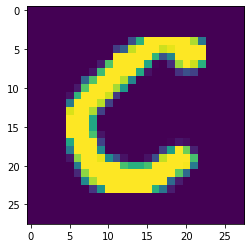

In [6]:
letter = rows[30000]
x = np.array([int(j) for j in letter[1:]])
x = x.reshape(28, 28)

print(letter)
plt.imshow(x)

Tạo dữ liệu vector

In [7]:
for letter in rows:
    if (letter[0] == '0') or (letter[0] == '1') or (letter[0] == '2') or (letter[0] == '3'):
        x = np.array([int(j) for j in letter[1:]])
        # x = x.reshape(28, 28)
        train_data.append(x)
        train_label.append(int(letter[0]))
    else:
        break

Xem số lượng

In [8]:
print(len(train_label))

56081


In [9]:
# import random

# shuffle_order = list(range(56081))
# random.shuffle(shuffle_order)

train_data = np.array(train_data)
train_label = np.array(train_label)

# train_data = train_data[shuffle_order]
# train_label = train_label[shuffle_order]

In [10]:
numA = 0; numB = 0; numC = 0; numD = 0;
for i in range(56081):
  if train_label[i] == 0:
    numA = numA +1
  elif(train_label[i] == 1):
    numB = numB +1
  elif(train_label[i] == 2):
    numC = numC +1
  elif(train_label[i] == 3): 
    numD = numD +1

In [11]:
print(numA, numB, numC, numD)

13870 8668 23409 10134


chúng ta chia tập dữ liệu của mình thành 2 tập riêng biệt

In [12]:
# print(train_data.shape)
train_x = train_data[:10000].astype(np.float32)
train_x = np.append(train_x, train_data[13871:20871].astype(np.float32), axis=0)
train_x = np.append(train_x, train_data[22539:42539].astype(np.float32), axis=0)
train_x = np.append(train_x, train_data[45948:53948].astype(np.float32), axis=0)
train_y = train_label[:10000].astype(np.float32)
train_y = np.append(train_y, train_label[13871:20871].astype(np.float32), axis=0)
train_y = np.append(train_y, train_label[22539:42539].astype(np.float32), axis=0)
train_y = np.append(train_y, train_label[45948:53948].astype(np.float32), axis=0)

test_x = train_data.astype(np.float32)
test_y = train_label.astype(np.float32)

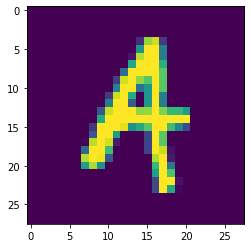

In [13]:
x = train_x[0].reshape(28,28)
plt.imshow(x)

1.0


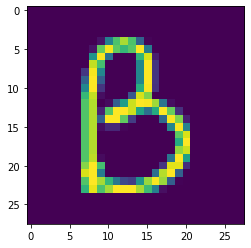

In [14]:
x = train_x[13860].reshape(28,28)
print (train_y[13860])
plt.imshow(x)

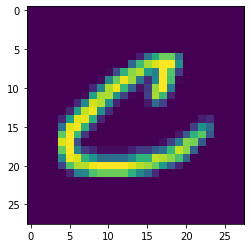

In [15]:
x = train_x[22539].reshape(28,28)
plt.imshow(x)

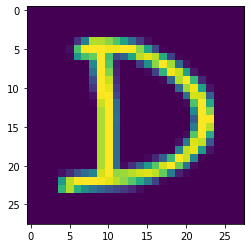

In [16]:
x = train_x[44001].reshape(28,28)
plt.imshow(x)

set up K

In [17]:
k = np.arange(4)
print(k)

[0 1 2 3]


In [18]:
# from tflearn.data_utils import to_categorical
# IMG_SIZE = 28
# train_x = train_x.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
# test_x = test_x.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x,train_y)


KNeighborsClassifier(n_neighbors=3)

In [21]:
from sklearn.metrics import accuracy_score
predicted= knn.predict(test_x) # 0:Overcast, 2:Mild
print(100*accuracy_score(test_y, predicted))

99.39373406322997


In [22]:
import pickle 
# Its important to use binary mode 
knnPickle = open('knnpickle_file', 'wb') 

# source, destination 
pickle.dump(knn, knnPickle)    